# COMP3115/4115: Exploratory Data Analysis and Visualization
# Project

Student Name: FENG Zixuan LEI Hao

Student Number:18253008

In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

df = pd.read_csv('data_small.csv')
X = df
# X.head()
df.isnull().values.any()
df.isnull().any()

MachineIdentifier                          False
ProductName                                False
EngineVersion                              False
AppVersion                                 False
AvSigVersion                               False
                                           ...  
Census_IsPenCapable                        False
Census_IsAlwaysOnAlwaysConnectedCapable     True
Wdft_IsGamer                                True
Wdft_RegionIdentifier                       True
HasDetections                              False
Length: 83, dtype: bool

In [2]:
percent = (X.isnull().sum()/X.shape[0]) * 100
new_X= pd.DataFrame(data=percent,columns=['Percentofnullvalues'])
new_X = new_X.sort_values(by='Percentofnullvalues',ascending=False)
print(new_X.head(36))

                                                   Percentofnullvalues
PuaMode                                                      99.969997
Census_ProcessorClass                                        99.579958
DefaultBrowsersIdentifier                                    95.279528
Census_IsFlightingInternal                                   83.088309
Census_InternalBatteryType                                   71.197120
Census_ThresholdOptIn                                        63.716372
Census_IsWIMBootEnabled                                      63.606361
SmartScreen                                                  36.033603
OrganizationIdentifier                                       30.273027
SMode                                                         6.090609
CityIdentifier                                                3.830383
Census_InternalBatteryNumberOfCharges                         3.150315
Wdft_RegionIdentifier                                         3.090309
Wdft_I

In [3]:
# Drop the features with more 70 percent null values
X = X.drop(['PuaMode','Census_ProcessorClass','DefaultBrowsersIdentifier','Census_IsFlightingInternal','Census_InternalBatteryType'],axis=1)
X.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,53447.0,1.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,53447.0,1.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,53447.0,1.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,53447.0,1.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,53447.0,1.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 78 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   MachineIdentifier                                  9999 non-null   object 
 1   ProductName                                        9999 non-null   object 
 2   EngineVersion                                      9999 non-null   object 
 3   AppVersion                                         9999 non-null   object 
 4   AvSigVersion                                       9999 non-null   object 
 5   IsBeta                                             9999 non-null   int64  
 6   RtpStateBitfield                                   9965 non-null   float64
 7   IsSxsPassiveMode                                   9999 non-null   int64  
 8   AVProductStatesIdentifier                          9969 non-null   float64
 9   AVProduc

<AxesSubplot:xlabel='HasDetections', ylabel='count'>

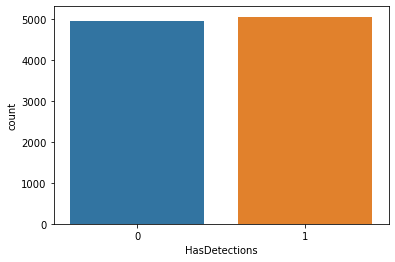

In [5]:
# The distribution of the target variable 'HasDetections' 
sns.countplot(x='HasDetections',data=df)

In [6]:
id = X['MachineIdentifier']
label = X['HasDetections']
new_train_data = X.drop(columns=['MachineIdentifier','HasDetections'])
new_train_data.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,53447.0,1.0,1.0,...,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0
1,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,53447.0,1.0,1.0,...,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0
2,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,53447.0,1.0,1.0,...,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0
3,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,53447.0,1.0,1.0,...,355.0,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0
4,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,53447.0,1.0,1.0,...,355.0,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0


In [7]:
# Find out numerical features, categorical features and binary features in the dataset and storing them in separate lists
def types_of_features(data):
    total_features = data.columns
    numerical_features = list(data._get_numeric_data().columns)
    categorical_features = list(set(total_features) - set(numerical_features))
    binary_features = []
    for i in numerical_features:
        if (data[str(i)].min() == 0 and data[str(i)].max() == 1) and data[str(i)].min()== 0:
            binary_features.append(i)
    
    numerical_features = list(set(numerical_features)- set(binary_features))

  
    return numerical_features,binary_features,categorical_features


numerical_features,binary_features,categorical_features = types_of_features(new_train_data)
print(binary_features)


['IsSxsPassiveMode', 'HasTpm', 'IsProtected', 'SMode', 'Firewall', 'UacLuaenable', 'Census_HasOpticalDiskDrive', 'Census_IsPortableOperatingSystem', 'Census_IsSecureBootEnabled', 'Census_IsVirtualDevice', 'Census_IsTouchEnabled', 'Census_IsPenCapable', 'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer']


In [8]:
def replace_smartscreen(val):
    val = val.lower()
    if val in 'block':
        return 'block'
    elif val in 'existsnotset':
        return 'existsnotset'
    elif val in 'off':
        return 'off'
    elif val in 'prompt':
        return 'prompt'
    elif val in 'requireadmin':
        return 'requireadmin'
    elif val in 'warn':
        return 'warn'
    elif val in 'on':
        return 'on'
    else:
        return 'unknown'

In [9]:

def replace_channel(val):
    ''' cleaning category values to reduce number of categories for activation channel'''
    val = val.lower()
    if 'oem' in val:
        return 'oem'
    elif 'retail' in val:
        return 'retail'
    elif 'volume' in val:
        return 'volume'
    else:
        return val
    
def replace_edition(val):
    ''' cleaning category values to reduce number of categories for os edition feature '''
    val = val.lower()
    if 'cloud' in val:
        return val
    elif 'core' in val:
        return 'core'
    elif 'education' in val:
        return 'education'
    elif 'enterprise' in val:
        return 'enterprise'
    elif 'pro' in val:
        return 'pro'
    elif 'server' in val:
        return 'server'
    elif 'home' in val:
        return 'home'
    else:
        return val
    
def replace_skuname(val):
    ''' cleaning category values to reduce number of categories  for os skuname'''
    val = val.lower()
    if 'cloud' in val:
        return val
    elif 'core' in val:
        return 'core'
    elif 'education' in val:
        return 'education'
    elif 'enterprise' in val:
        return 'enterprise'
    elif 'pro' in val:
        return 'pro'
    elif 'server' in val:
        return 'server'
    elif 'home' in val:
        return 'home'
    else:
        return val

In [10]:
def filling_missing_value(data, numerical_features,binary_features,categorical_features):
    # replacing null values with mode value of that feature in in numerical features
    for feature in numerical_features:
        data[feature] = data[feature].fillna(-1)
#         data[feature] = data[feature].fillna(data[feature].mode()[0])
    # replaceing null values with mode value of that feature in binary features
    for feature in binary_features:
        data[feature] = data[feature].fillna(data[feature].mode()[0])
    

    data['SmartScreen'] = data['SmartScreen'].astype('category')
    data['SmartScreen'] = data['SmartScreen'].apply(replace_smartscreen) 
    data['Census_OSSkuName'] = data['Census_OSSkuName'].apply(replace_skuname)
#     data['Census_OSSkuName'] = data['Census_OSSkuName'].astype('category')
    data['Census_OSEdition'] = data['Census_OSEdition'].apply(replace_edition)
#     data['Census_OSEdition'] = data['Census_OSEdition'].astype('category') 
    data['Census_ActivationChannel'] = data['Census_ActivationChannel'].apply(replace_channel)
#     data['Census_ActivationChannel'] = data['Census_ActivationChannel'].astype('category')  
    data['Census_ChassisTypeName'].replace(['UNKNOWN','Unknown','Other'],'unknown',inplace=True)
    data['Census_PowerPlatformRoleName'].replace(['UNKNOWN','Unspecified'],'unknown',inplace=True)
    data['Census_FlightRing'].replace(['Invalid','Unknown'],'unknown',inplace=True)
    data['Census_OSSkuName'].replace(['UNDEFINED'],'unknown',inplace=True)
    data['SkuEdition'].replace(['Invalid'],'unknown',inplace=True)
    data['Census_OSWUAutoUpdateOptionsName'].replace(['UNKNOWN'],'unknown',inplace=True)
    data['Census_PrimaryDiskTypeName'].replace(['UNKNOWN','Unspecified'],'unknown',inplace=True)
    data['Census_GenuineStateName'].replace(['UNKNOWN'],'unknown',inplace=True)
#     print('data before loop:')
#    print(data['SmartScreen'])    

#     replacing null values by adding category called 'unknown' in categorical features
    for feature in categorical_features:
        data[feature] = data[feature].replace(np.nan, 'unknown')
    return data
#     print('data after loop:')
   
     

updated_X = filling_missing_value(new_train_data,numerical_features,binary_features,categorical_features)
#updated_X.info()

In [11]:
def list_to_df(list):
    reData=pd.DataFrame()
    for i in range(len(list)):
        reData[list[i]]=updated_X[list[i]]
        i=i+1
    reData['HasDetections']=df['HasDetections']
    return reData

def list_to_df_bi(list):
    reData=pd.DataFrame()
    for i in range(len(list)):
        reData[list[i]]=updated_X[list[i]]
        i=i+1
    reData['HasDetections']=df['HasDetections']
    return reData
NumDfForMatrix = list_to_df(numerical_features)
CatDfForMatrix = list_to_df(categorical_features)
BinDfForMatrix = list_to_df_bi(binary_features)

In [12]:
def assign_num_to_cate(category):
    category['SmartScreen'] = category['SmartScreen'].map( {'unknown': 0, 'requireadmin': 1,'off':2,'prompt':3,'block':4,'warn':5,'on':6,'existsnotset':7} ).astype('float')
    category['OsVer'] = category['OsVer'].map( {'6.1.1.0': 2, '6.3.0.0': 1,'10.0.0.0':0} ).astype('float')
    category['Census_OSInstallTypeName'] = category['Census_OSInstallTypeName'].map( {'UUPUpgrade': 0, 'IBSClean': 1,'Update':2,'Upgrade':3,'Other':4,'Reset':5,'Refresh':6,'Clean':7,'CleanPCRefresh':8} ).astype('float')
    category['Census_PowerPlatformRoleName'] = category['Census_PowerPlatformRoleName'].map( {'Mobile': 0, 'Desktop': 1,'Slate':2,'Workstation':3,'SOHOServer':4,'unknown':5,'AppliancePC':6,'EnterpriseServer':7} ).astype('float')
#1661     category['AvSigVersion'] = category['AvSigVersion'].map( {'female': 0, 'male': 1} ).astype('float')
#205     category['OsBuildLab'] = category['OsBuildLab'].map( {'female': 0, 'male': 1} ).astype('float')
    category['Census_OSArchitecture'] = category['Census_OSArchitecture'].map( {'amd64': 0, 'x86': 1,'arm64':2} ).astype('float')
    category['Census_GenuineStateName'] = category['Census_GenuineStateName'].map( {'IS_GENUINE': 0, 'INVALID_LICENSE': 1,'OFFLINE':2,'unknown':3} ).astype('float')
    category['Census_OSSkuName'] = category['Census_OSSkuName'].map( {'core': 0, 'pro': 1,'enterprise':2,'education':3,'server':4,'cloud':5} ).astype('float')
# 184    category['Census_OSVersion'] = category['Census_OSVersion'].map( {'female': 0, 'male': 1} ).astype('float')
    category['Census_ChassisTypeName'] = category['Census_ChassisTypeName'].map( {'Notebook':0,'Desktop':1,'Laptop':2,'Portable':3,'AllinOne':4,'unknown':5,'Convertible':6,'MiniTower':7,'Detachable':8,'HandHeld':9,'LowProfileDesktop':10,'SpaceSaving':11,'Tablet':12,'Tower':13,'MainServerChassis':14,'MiniPC':15,'LunchBox':16,'RackMountChassis':17,'30':18,'SubNotebook':19,'StickPC':20}).astype('float')
#     category['AppVersion'] = category['AppVersion'].map( {'female': 0, 'male': 1} ).astype('float')
    category['ProductName'] = category['ProductName'].map( {'win8defender': 0, 'mse': 1} ).astype('float')
    category['Census_DeviceFamily'] = category['Census_DeviceFamily'].map( {'Windows.Desktop': 0, 'Windows.Server': 1} ).astype('float')
    category['SkuEdition'] = category['SkuEdition'].map( {'Home':0,'Pro':1,'unknown':2,'Education':3,'Enterprise':4,'Enterprise LTSB':5,'Cloud':6,'Server':7} ).astype('float')
    category['Processor'] = category['Processor'].map( {'x64': 0, 'x86': 1,'arm64':2} ).astype('float')
    category['Census_ActivationChannel'] = category['Census_ActivationChannel'].map( {'retail': 0, 'oem': 1,'volume':2} ).astype('float')
    category['Census_OSWUAutoUpdateOptionsName'] = category['Census_OSWUAutoUpdateOptionsName'].map( {'FullAuto':0,'unknown':1,'Notify':2,'AutoInstallAndRebootAtMaintenanceTime':3,'Off':4,'DownloadNotify':5} ).astype('float')
    category['Census_OSBranch'] = category['Census_OSBranch'].map( {'rs4_release':0,'rs3_release':1,'rs3_release_svc_escrow':2,'rs1_release':3,'rs2_release':4,'th2_release':5,'th2_release_sec':6,'th1_st1':7,'th1':8,'rs5_release':9,'rs3_release_svc_escrow_im':10,'rs_prerelease_flt':11,'rs_prerelease':12} ).astype('float')
    category['Census_FlightRing'] = category['Census_FlightRing'].map( {'Retail':0,'NOT_SET':1,'unknown':2,'WIS':3,'WIF':4,'RP':5,'Disabled':6} ).astype('float')
    category['Platform'] = category['Platform'].map( {'windows10':0,'windows8':1,'windows7':2,'windows2016':3} ).astype('float')
    category['Census_PrimaryDiskTypeName'] = category['Census_PrimaryDiskTypeName'].map( {'HDD':0,'SSD':1,'unknown':2} ).astype('float')
    category['Census_OSEdition'] = category['Census_OSEdition'].map( {'core':0,'pro':1,'education':2,'enterprise':3,'server':4,'cloud':5} ).astype('float')
    category['Census_MDC2FormFactor'] = category['Census_MDC2FormFactor'].map( {'Notebook':0,'Desktop':1,'Convertible':2,'AllInOne':3,'Detachable':4,'PCOther':5,'LargeTablet':6,'SmallTablet':7,'SmallServer':8,'MediumServer':9,'LargeServer':10} ).astype('float')
    category['EngineVersion'] = category['EngineVersion'].map( {'1.1.15200.1': 0,'1.1.15100.1':2,'1.1.15000.2':3,'1.1.14901.4':4,'1.1.14600.4':5,
                                                                '1.1.15300.6':6,'1.1.14800.3':7,'1.1.14104.0':8,
                                                                '1.1.13504.0':9,'1.1.15300.5':10,'1.1.14500.5':11,'1.1.14700.5':12,'1.1.14405.2':13,'1.1.14306.0':14,
                                                                '1.1.13303.0':15,'1.1.14202.0':16,'1.1.13804.0':17,'1.1.13601.0':18,'1.1.13407.0':19,'1.1.14003.0':20,
                                                                '1.1.13903.0':21,'1.1.15000.1':22,'1.1.13202.0':23,'1.1.14305.0':24,'1.1.13704.0':24,'1.1.12902.0':26,
                                                                '1.1.13103.0':27,'1.1.13701.0':28,'1.1.14700.3':29,'1.1.13000.0':30,'1.1.14700.4':31,'1.1.14103.0':32,
                                                                '1.1.14800.1':33,'1.1.14901.3':34,'1.1.14002.0':35,'1.1.12805.0':36} ).astype('float')
    category['OsPlatformSubRelease'] = category['OsPlatformSubRelease'].map( {'rs4':0,'rs3':1,'rs2':2,'rs1':3,'th2':4,'th1':5,'windows8.1':6,'windows7':7,'prers5':8} ).astype('float')
    
    category.info()
    return category


    
cate_to_num=assign_num_to_cate(CatDfForMatrix)
cate_to_num_drop = cate_to_num.drop(columns=['AvSigVersion','OsBuildLab','Census_OSVersion','AppVersion'])
# cate_to_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Census_OSArchitecture             9999 non-null   float64
 1   SmartScreen                       9999 non-null   float64
 2   EngineVersion                     9999 non-null   float64
 3   Census_ChassisTypeName            9999 non-null   float64
 4   Census_PrimaryDiskTypeName        9999 non-null   float64
 5   OsBuildLab                        9999 non-null   object 
 6   ProductName                       9999 non-null   float64
 7   OsVer                             9999 non-null   float64
 8   Census_OSVersion                  9999 non-null   object 
 9   Census_OSWUAutoUpdateOptionsName  9999 non-null   float64
 10  AvSigVersion                      9999 non-null   object 
 11  Census_MDC2FormFactor             9999 non-null   float64
 12  Census

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
def correlated_Matrix(features):
    plt.figure(figsize=(14,14))
    sns.heatmap(features.corr(), annot=True, fmt='.0%')

# correlated_Matrix(NumDfForMatrix)
# correlated_Matrix(cate_to_num_drop)
# correlated_Matrix(BinDfForMatrix)


In [14]:
def scatter_plot_for_varNumPairs(var1,var2):
    fig = plt.figure(figsize=(5, 5));
    plt.scatter(NumDfForMatrix[var1].values,NumDfForMatrix[var2].values,c=NumDfForMatrix['HasDetections'].values,edgecolor='none')
    plt.xlabel(var1)
    plt.ylabel(var2);
# 95%
# scatter_plot_for_varNumPairs('OsBuild','Census_OSBuildNumber')
# 99%
# scatter_plot_for_varNumPairs('Census_OSInstallLanguageIdentifier','Census_OSUILocaleIdentifier')
# 89%
# scatter_plot_for_varNumPairs('Census_InternalPrimaryDisplayResolutionHorizontal','Census_InternalPrimaryDisplayResolutionVertical')

# Bar Chart

In [15]:
def generate_correlation_barchart(dataFrame):
    barSeries=dataFrame[dataFrame.columns[0:]].corr()['HasDetections']
    barData = barSeries.to_frame()
    barData = barData.rename(columns = {'HasDetections':'correlation'})
    barData['attributes']=dataFrame.columns[0:].values
    attribute=barData['attributes']
    correlation=barData['correlation']
    fig = plt.subplots(figsize =(14, 9))
    plt.bar(attribute, correlation)
    plt.xticks(rotation=90)
    plt.show()
# generate_correlation_barchart(NumDfForMatrix)
# generate_correlation_barchart(cate_to_num_drop)
# generate_correlation_barchart(BinDfForMatrix)

In [31]:
# Divide training and testing dataset
from sklearn.model_selection import train_test_split
# X_attributes = X.drop(['HasDetections'],axis=1)
X_attributes=pd.concat( [cate_to_num_drop, NumDfForMatrix,BinDfForMatrix], axis=1 ).astype('float')
# X_attributes = cate_to_num_drop.astype('float').values
y=pd.DataFrame()
y['HasDetections']= X['HasDetections'].values
X_train, X_test, y_train, y_test = train_test_split(X_attributes, y, test_size=0.3, random_state=4)

# X_train.head(15)
X_test.head(10)
# y_train.info()



,Census_OSArchitecture,SmartScreen,EngineVersion,Census_ChassisTypeName,Census_PrimaryDiskTypeName,ProductName,OsVer,Census_OSWUAutoUpdateOptionsName,Census_MDC2FormFactor,Census_PowerPlatformRoleName,...,UacLuaenable,Census_HasOpticalDiskDrive,Census_IsPortableOperatingSystem,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,HasDetections
1603,0.0,1.0,0.0,8.0,1.0,0.0,0.0,2.0,4.0,2.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
8713,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4561,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6600,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2558,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7642,0.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8911,0.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3319,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6852,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1366,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


# test dataframe

In [30]:
testYDf=pd.DataFrame()
testXDf=pd.DataFrame()
testYDf['HasDetections']=df['HasDetections']
testXDf['SmartScreen']=cate_to_num['SmartScreen']
testXDf['AVProductsInstalled']=NumDfForMatrix['AVProductsInstalled']
testXDf['AVProductStatesIdentifier ']=NumDfForMatrix['AVProductStatesIdentifier']
X_attributes_1=testXDf.astype('float')
X_attributes_1.info()
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(testXDf, testYDf, test_size=0.3, random_state=4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SmartScreen                 9999 non-null   float64
 1   AVProductsInstalled         9999 non-null   float64
 2   AVProductStatesIdentifier   9999 non-null   float64
dtypes: float64(3)
memory usage: 234.5 KB


# Voted Perceptron

In [18]:
def classification_error(X, y, w): # X and y are data, w is the model
    # Error defined as fraction of misclassified points
    M = len(X)
    n_mispts = 0
    error = 0
    for xi, yi in zip(X,y):
        if int(np.sign(w.T.dot(xi))) != yi:
            n_mispts += 1
            error = n_mispts / float(M)
    return error
def my_perceptron_train(X, y, maxIter = 20):
    # Initialize the weigths to zeros
    X_train = np.c_[X.copy(), np.ones(X.shape[0])] # add a constant cloumns with all elements equal to one
    w = np.zeros(X_train.shape[1])
    it = 0
    w_best = w.copy()
    min_error_rate = 1
    # Iterate until all points are correctly classified
    while(it < maxIter):
        it = it + 1
        for xi, yi in zip(X_train,y):
            if int(np.sign(w.T.dot(xi))) != yi:
                print(w)
                w += yi*xi
            error_rate = classification_error(X_train, y, w)
            if(error_rate == 0):
                return w
            if(error_rate < min_error_rate):    # maintain the best solution
                w_best = w.copy()
                min_error_rate = error_rate
    
    return w_best
                
def my_perceptron_prediction(X, w):
    X_test = np.c_[X, np.ones(X.shape[0])] 
    y_pred = np.ones(X_test.shape[0])
    i = 0
    for xi in X_test:
        if np.sign(w.T.dot(xi)) < 0:
            y_pred[i] = -1
        i = i+1
    return y_pred 


In [19]:
# w = my_perceptron_train(X_train,y_train, maxIter = 100)
# y_pred = my_perceptron_prediction(X_test, w)

# print("test accuracy: " + str(sum(y_test == y_pred)/len(y_pred)))

# w = my_perceptron_train(X_train_1,y_train_1, maxIter = 100)
# y_pred_1 = my_perceptron_prediction(X_test_1, w)

# print("test accuracy: " + str(sum(y_test_1 == y_pred_1)/len(y_pred_1)))

# SVM

In [20]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm_classifier = SVC() #default value

cv_accuracy = cross_val_score(svm_classifier, X_train, y_train, scoring='accuracy', cv = 5) #derive function into five ..four of them are training
cv_accuracy_1 = cross_val_score(svm_classifier, X_train_1, y_train_1, scoring='accuracy', cv = 5) #derive function into five ..four of them are training

# print(cv_accuracy)
# print(cv_accuracy.mean())
# print(cv_accuracy_1)
# print(cv_accuracy_1.mean())
print("Whole DataFrame:")
print(cv_accuracy)
print(cv_accuracy.mean())
print("Partial DataFrame:")
print(cv_accuracy_1)
print(cv_accuracy_1.mean())

/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Whole DataFrame:
[0.49785714 0.52714286 0.51428571 0.5        0.50679056]
0.5092152557949555
Partial DataFrame:
[0.545      0.53142857 0.54142857 0.53285714 0.54253038]
0.5386489329112631


In [21]:
# X_train.head()

In [22]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Perceptron

svm_classifier = SVC(C = 100, gamma = 'auto')

cv_accuracy = cross_val_score(svm_classifier, X_train, y_train, scoring='accuracy', cv = 5)
cv_accuracy_1 = cross_val_score(svm_classifier, X_train_1, y_train_1, scoring='accuracy', cv = 5)
print("Whole DataFrame:")
print(cv_accuracy)
print(cv_accuracy.mean())
print("Partial DataFrame:")
print(cv_accuracy_1)
print(cv_accuracy_1.mean())

/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Whole DataFrame:
[0.5        0.50071429 0.50071429 0.50071429 0.5003574 ]
0.5005000510568773
Partial DataFrame:
[0.59642857 0.58428571 0.56       0.55714286 0.57112223]
0.5737958746043091


# Cross validation with Neural network

In [23]:
from sklearn.neural_network import MLPClassifier #two hidden layers(50,200); activation 
mlp_classifier = MLPClassifier(hidden_layer_sizes=(20, 50), activation='relu', learning_rate_init = 0.01, max_iter=400)
cv_accuracy = cross_val_score(mlp_classifier, X_train, y_train, scoring='accuracy', cv = 5)
cv_accuracy_1 = cross_val_score(mlp_classifier, X_train_1, y_train_1, scoring='accuracy', cv = 5)
print("Whole DataFrame:")
print(cv_accuracy)
print(cv_accuracy.mean())
print("Partial DataFrame:")
print(cv_accuracy_1)
print(cv_accuracy_1.mean())
# print('Accracy: ',cv_accuracy)
# print('Accuacy mean: ',cv_accuracy.mean())

/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Whole DataFrame:
[0.5        0.49928571 0.50428571 0.50071429 0.50822016]
0.5025011743081793
Partial DataFrame:
[0.53857143 0.50071429 0.50142857 0.52428571 0.5003574 ]
0.5130714796283058


# Cross validation with KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=5)
print("Whole DataFrame:")
print('Score: ',cross_val_score(KNN_classifier, X_train, y_train, scoring='accuracy', cv = 5))
print('Score mean: ',cross_val_score(KNN_classifier, X_train, y_train, scoring='accuracy', cv = 5).mean())
print("Partial DataFrame:")
print('Score: ',cross_val_score(KNN_classifier, X_train_1, y_train_1, scoring='accuracy', cv = 5))
print('Score mean: ',cross_val_score(KNN_classifier, X_train_1, y_train_1, scoring='accuracy', cv = 5).mean())

Whole DataFrame:


/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_se

Score:  [0.50642857 0.52285714 0.51071429 0.53071429 0.52037169]


/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_se

Score mean:  0.5182171959562953
Partial DataFrame:


/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_se

Score:  [0.58714286 0.565      0.56       0.54285714 0.57398142]


/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_se

Score mean:  0.565796283059328


In [25]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=50)
print("Whole DataFrame:")
print('Score: ',cross_val_score(KNN_classifier, X_train, y_train, scoring='accuracy', cv = 5))
print('Score mean: ',cross_val_score(KNN_classifier, X_train, y_train, scoring='accuracy', cv = 5).mean())
print("Partial DataFrame:")
print('Score: ',cross_val_score(KNN_classifier, X_train_1, y_train_1, scoring='accuracy', cv = 5))
print('Score mean: ',cross_val_score(KNN_classifier, X_train_1, y_train_1, scoring='accuracy', cv = 5).mean())

Whole DataFrame:


/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_se

Score:  [0.51642857 0.52928571 0.52571429 0.50714286 0.53538242]


/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_se

Score mean:  0.5227907689165731
Partial DataFrame:


/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_se

Score:  [0.58928571 0.59214286 0.55714286 0.57428571 0.56826305]


/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_se

Score mean:  0.5762240375778618


In [35]:
X_test_without_label = X_test.drop(['HasDetections'], axis=1)
X_test_without_label.head()

,Census_OSArchitecture,SmartScreen,EngineVersion,Census_ChassisTypeName,Census_PrimaryDiskTypeName,ProductName,OsVer,Census_OSWUAutoUpdateOptionsName,Census_MDC2FormFactor,Census_PowerPlatformRoleName,...,Firewall,UacLuaenable,Census_HasOpticalDiskDrive,Census_IsPortableOperatingSystem,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer
1603,0.0,1.0,0.0,8.0,1.0,0.0,0.0,2.0,4.0,2.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8713,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4561,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6600,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2558,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [62]:
# F1 score of svm
import numpy as np
from sklearn import svm
svm_classifier = SVC()
svm_f1_scores = cross_val_score(svm_classifier, X_test_without_label, y_test, cv=10, scoring='f1')
print("F1 score: ",svm_f1_scores)
print("F1 score mean:",svm_f1_scores.mean())

/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

F1 score:  [0.68131868 0.68131868 0.68131868 0.68131868 0.68131868 0.68131868
 0.68421053 0.68421053 0.68421053 0.68421053]
F1 score mean: 0.6824754193175246


In [63]:
# F1 score of nn
from sklearn.neural_network import MLPClassifier #two hidden layers(50,200); activation 
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50, 200), activation='relu', learning_rate_init = 0.01, max_iter=400)
nn_f1 = cross_val_score(mlp_classifier, X_test_without_label, y_test, scoring='f1', cv = 10)
print("F1 score: ",nn_f1)
print("F1 score mean:",nn_f1.mean())


/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

F1 score:  [0.68131868 0.66357309 0.62105263 0.66666667 0.66042155 0.67713004
 0.68131868 0.68292683 0.64775414 0.67567568]
F1 score mean: 0.665783797930015


In [64]:
# F1 score of KNN
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=5)
knn_f1 = cross_val_score(KNN_classifier, X_test_without_label, y_test, scoring='f1', cv = 10)

print("F1 score: ",knn_f1)
print("F1 score mean:",knn_f1.mean())


/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_se

F1 score:  [0.54761905 0.50909091 0.5477707  0.56790123 0.51552795 0.53918495
 0.52427184 0.56346749 0.57910448 0.49846154]
F1 score mean: 0.5392400148197152


/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


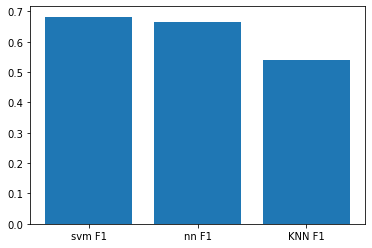

In [65]:
import matplotlib.pyplot as plt

x = np.array(['svm F1','nn F1','KNN F1'])
y = np.array([svm_f1_scores.mean(), nn_f1.mean(), knn_f1.mean()])

plt.bar(x,y)
plt.show()

In [76]:
# ROC_AUC of svm
import numpy as np
from sklearn import svm
svm_classifier = SVC()
svm_ROC_AUC = cross_val_score(svm_classifier, X_test_without_label, y_test, cv=10, scoring='roc_auc')
# svm_ROC_AUC =1-svm_ROC_AUC
print("ROC_AUC: ",svm_ROC_AUC)
print("ROC_AUC mean:",svm_ROC_AUC.mean())

/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

ROC_AUC:  [0.43839822 0.50669633 0.5353059  0.51172414 0.53147942 0.58629588
 0.49434651 0.43612001 0.54433761 0.52261396]
ROC_AUC mean: 0.5107317979933386


In [73]:
# ROC_AUC of nn
from sklearn.neural_network import MLPClassifier #two hidden layers(50,200); activation 
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50, 200), activation='relu', learning_rate_init = 0.01, max_iter=400)
nn_ROC_AUC = cross_val_score(mlp_classifier, X_test_without_label, y_test, scoring='roc_auc', cv = 10)
nn_ROC_AUC = 1-nn_ROC_AUC
print("ROC_AUC: ",nn_ROC_AUC)
print("ROC_AUC mean:",nn_ROC_AUC.mean())

/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

ROC_AUC:  [0.52921023 0.51506118 0.49964405 0.51185762 0.49795328 0.50896552
 0.50623219 0.49236556 0.54780983 0.49670584]
ROC_AUC mean: 0.5105805305792444


In [77]:
# ROC_AUC of KNN
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=5)
knn_ROC_AUC = cross_val_score(KNN_classifier, X_test_without_label, y_test, scoring='roc_auc', cv = 10)
# knn_ROC_AUC = 1-knn_ROC_AUC
print("ROC_AUC: ",knn_ROC_AUC)
print("ROC_AUC mean:",knn_ROC_AUC.mean())

/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_se

ROC_AUC:  [0.50015573 0.46175751 0.53715239 0.52451613 0.48914349 0.50131257
 0.5252849  0.51905271 0.50625445 0.44235221]
ROC_AUC mean: 0.5006982086181544


/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/fengzixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


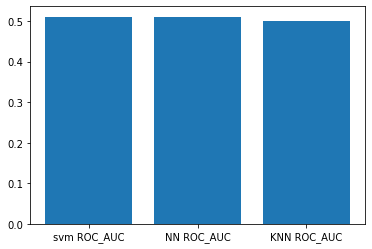

In [78]:

x = np.array(['svm ROC_AUC','NN ROC_AUC','KNN ROC_AUC'])
y = np.array([svm_ROC_AUC.mean(), nn_ROC_AUC.mean(), knn_ROC_AUC.mean()])

plt.bar(x,y)
plt.show()